##### Это финальное задание по курсу «Поиск структуры в данных».

В нем вы попробуете визуализировать данные при помощи PCA и t-SNE и сравните визуально качество этих методов. Также вы попробуете использовать новые признаковые описания для повышения качества классификации объектов.

В качестве данных для этого задания будем использовать данные соревнования Otto Group Product Classification Challenge: https://www.kaggle.com/c/otto-group-product-classification-challenge

Так как данных там может быть слишком много для обработки на домашнем компьютере с помощью t-SNE, то мы сделали их случайную подвыборку и приложили к заданию (файл data.csv).

In [1]:
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.manifold
import sklearn.decomposition
import sklearn.metrics
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

### Загрузка данных

Загрузите данные из __data.csv__. Положите первые 70% объектов для обучения моделей, а оставшиеся 30% для контроля. Учтите, что первый столбец — это __id__ объекта и его нужно убрать из признаков (потому что сейчас классы объектов отсортированы по __id__). Так как некоторые алгоритмы и метрики считают, что метки классов — это последовательные числа с нуля, то сразу приведите целевую переменную к такому виду. Отрисовку и понижение размерности данных делайте сразу и для обучающей, и для тестовой выборки.

In [3]:
dataOne = pd.read_csv('data.csv')
data = pd.read_csv('data.csv')
data = data.drop('id',1)
target = data[['target']]
data = data.drop('target',1)
data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,2,...,0,2,9,0,8,3,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
targetTrain = target[:len(target[:int(len(target)*0.7)])]
targetTest = target[-len(target[:int(len(target)*0.3)]):]
print(len(targetTrain), 'Train') 
print(len(targetTest), 'Test')

(7000, 'Train')
(3000, 'Test')


In [5]:
training = data[:len(data[:int(len(data)*0.7)])]
len(training)

7000

In [6]:
test = data[-len(data[:int(len(data)*0.3)]):]
len(test)

3000

### Визуализация с помощью PCA

Понизьте размерность данных до 2-ух с помощью метода главных компонент. Нарисуйте полученную выборку, при этом цветом выделите объекты разных классов.

In [7]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

In [8]:
model = PCA(n_components=2, random_state=2345)

In [9]:
model.fit(training)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=2345,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
transformPCA = model.fit_transform(training)

In [11]:
print targetTrain.target.value_counts()
print targetTrain.target.unique()
print targetTrain.values

Class_2    1899
Class_6    1550
Class_8     946
Class_3     900
Class_9     569
Class_7     340
Class_4     289
Class_5     288
Class_1     219
Name: target, dtype: int64
['Class_2' 'Class_4' 'Class_8' 'Class_7' 'Class_6' 'Class_3' 'Class_1'
 'Class_9' 'Class_5']
[['Class_2']
 ['Class_2']
 ['Class_2']
 ...
 ['Class_3']
 ['Class_6']
 ['Class_2']]


In [12]:
targetTrainNew = []
for z in targetTrain.values:
    targetTrainNew.append(z[0])

In [15]:
print len(set(targetTrainNew))
print len(colors)

9
9


In [14]:
colors = cm.rainbow(np.linspace(0, 1, len(set(targetTrainNew))))

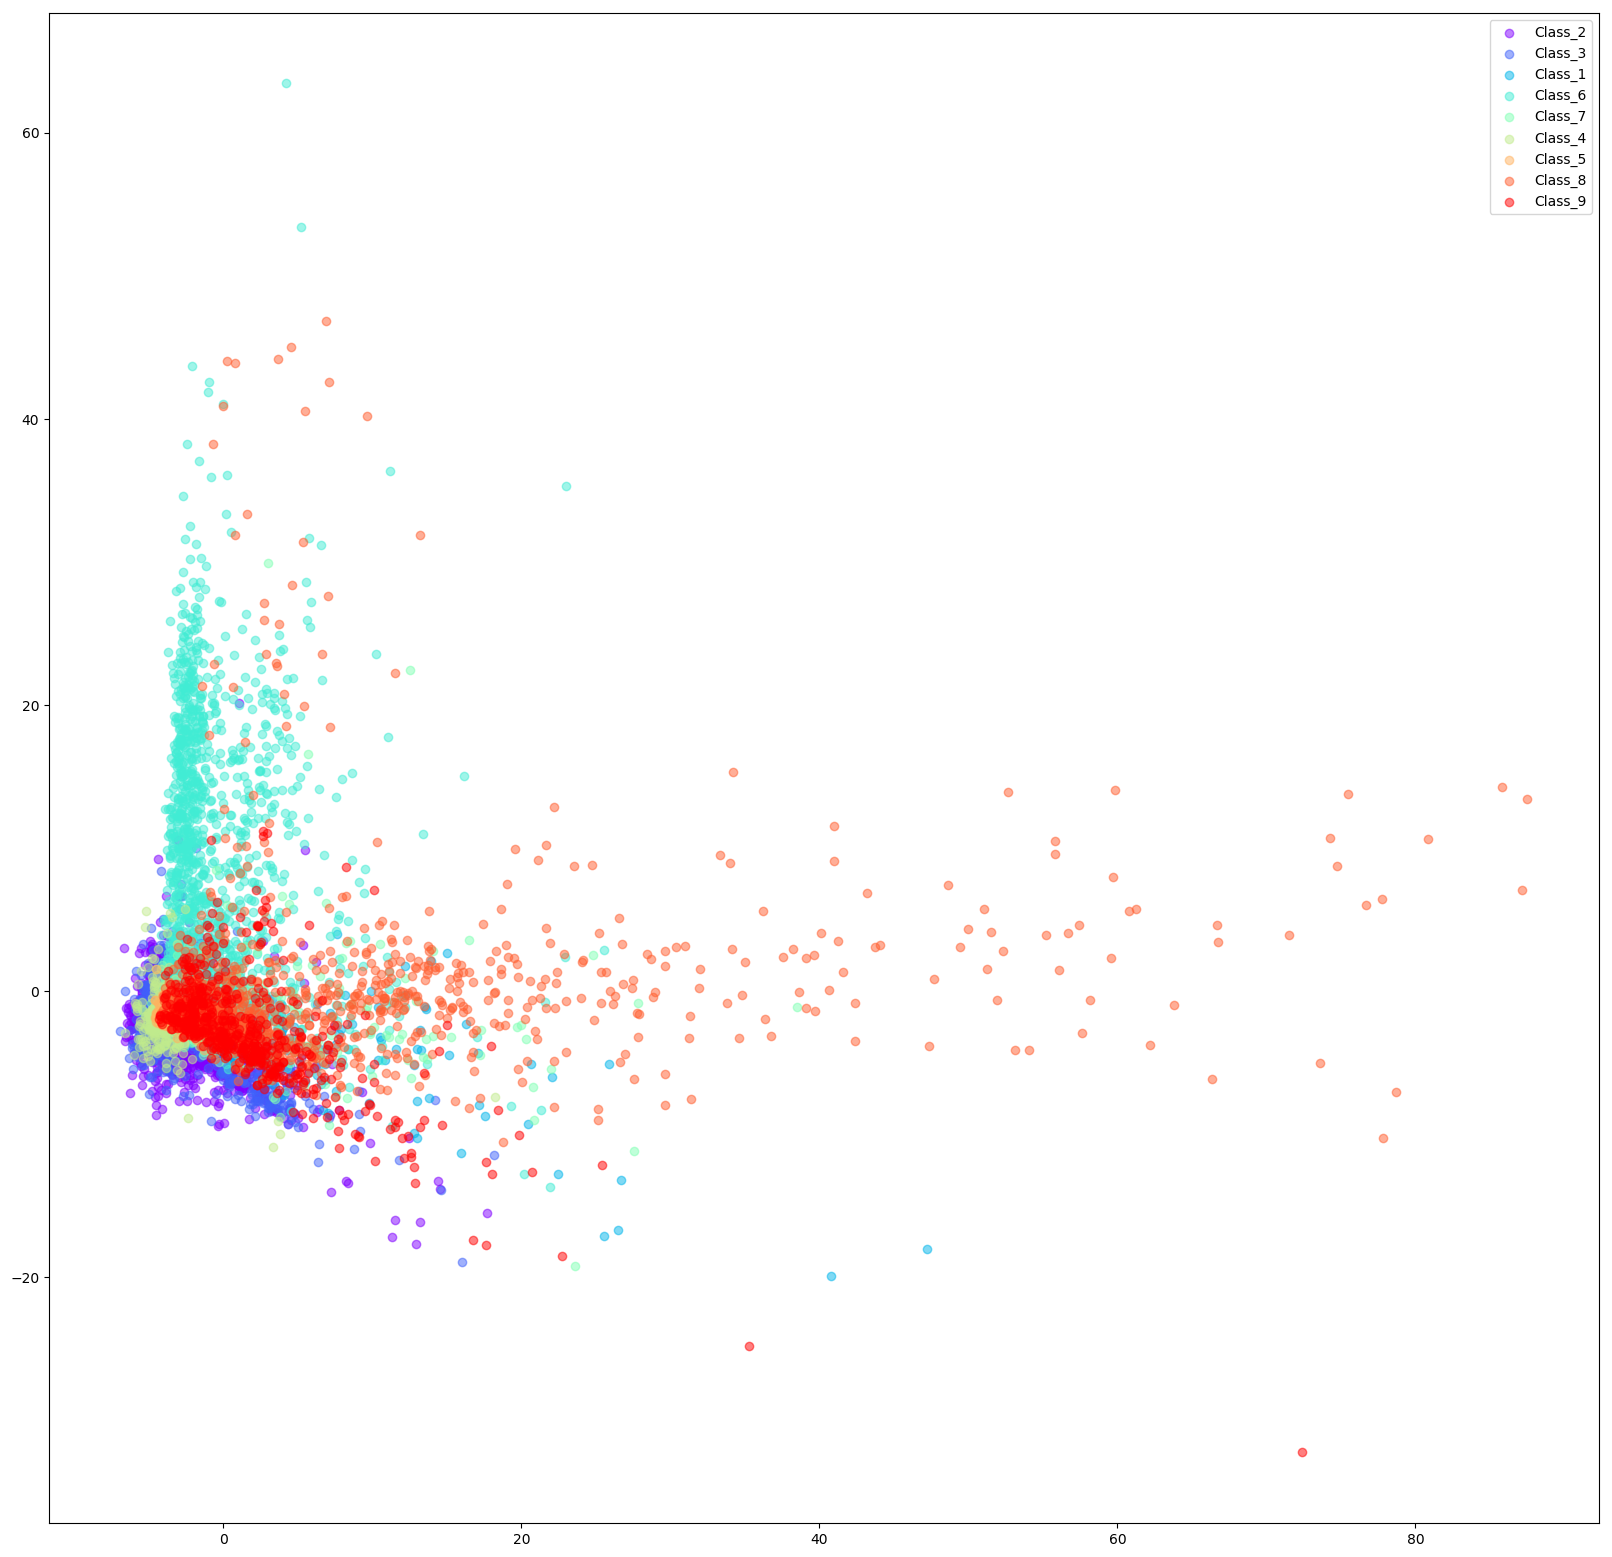

In [16]:
plt.figure(figsize=(20, 20), dpi=100)
for y, c in zip(set(targetTrainNew), colors):
    plt.scatter(transformPCA[np.array(targetTrainNew)==y, 0], 
                transformPCA[np.array(targetTrainNew)==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

### Визуализация с помощью t-SNE

Теперь понизьте размерность данных до 2-ух с помощью метода t-SNE. В качестве параметров возьмите learning_rate=1000, init="random" и random_state=1234 (последнее — для воспроизводимости результата). Нарисуйте полученную выборку, при этом цветом выделите объекты разных классов. Сравните качественно разделимость классов при понижении размерности с помощью PCA и t-SNE.

In [17]:
from sklearn.manifold import TSNE

In [18]:
modelTSNE = TSNE(learning_rate=1000, init="random", random_state=1234, n_components=2)

In [19]:
modelTSNE.fit(training)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=1000,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=1234, verbose=0)

In [20]:
transformTSNE_representation = TSNE(random_state=556).fit_transform(training)

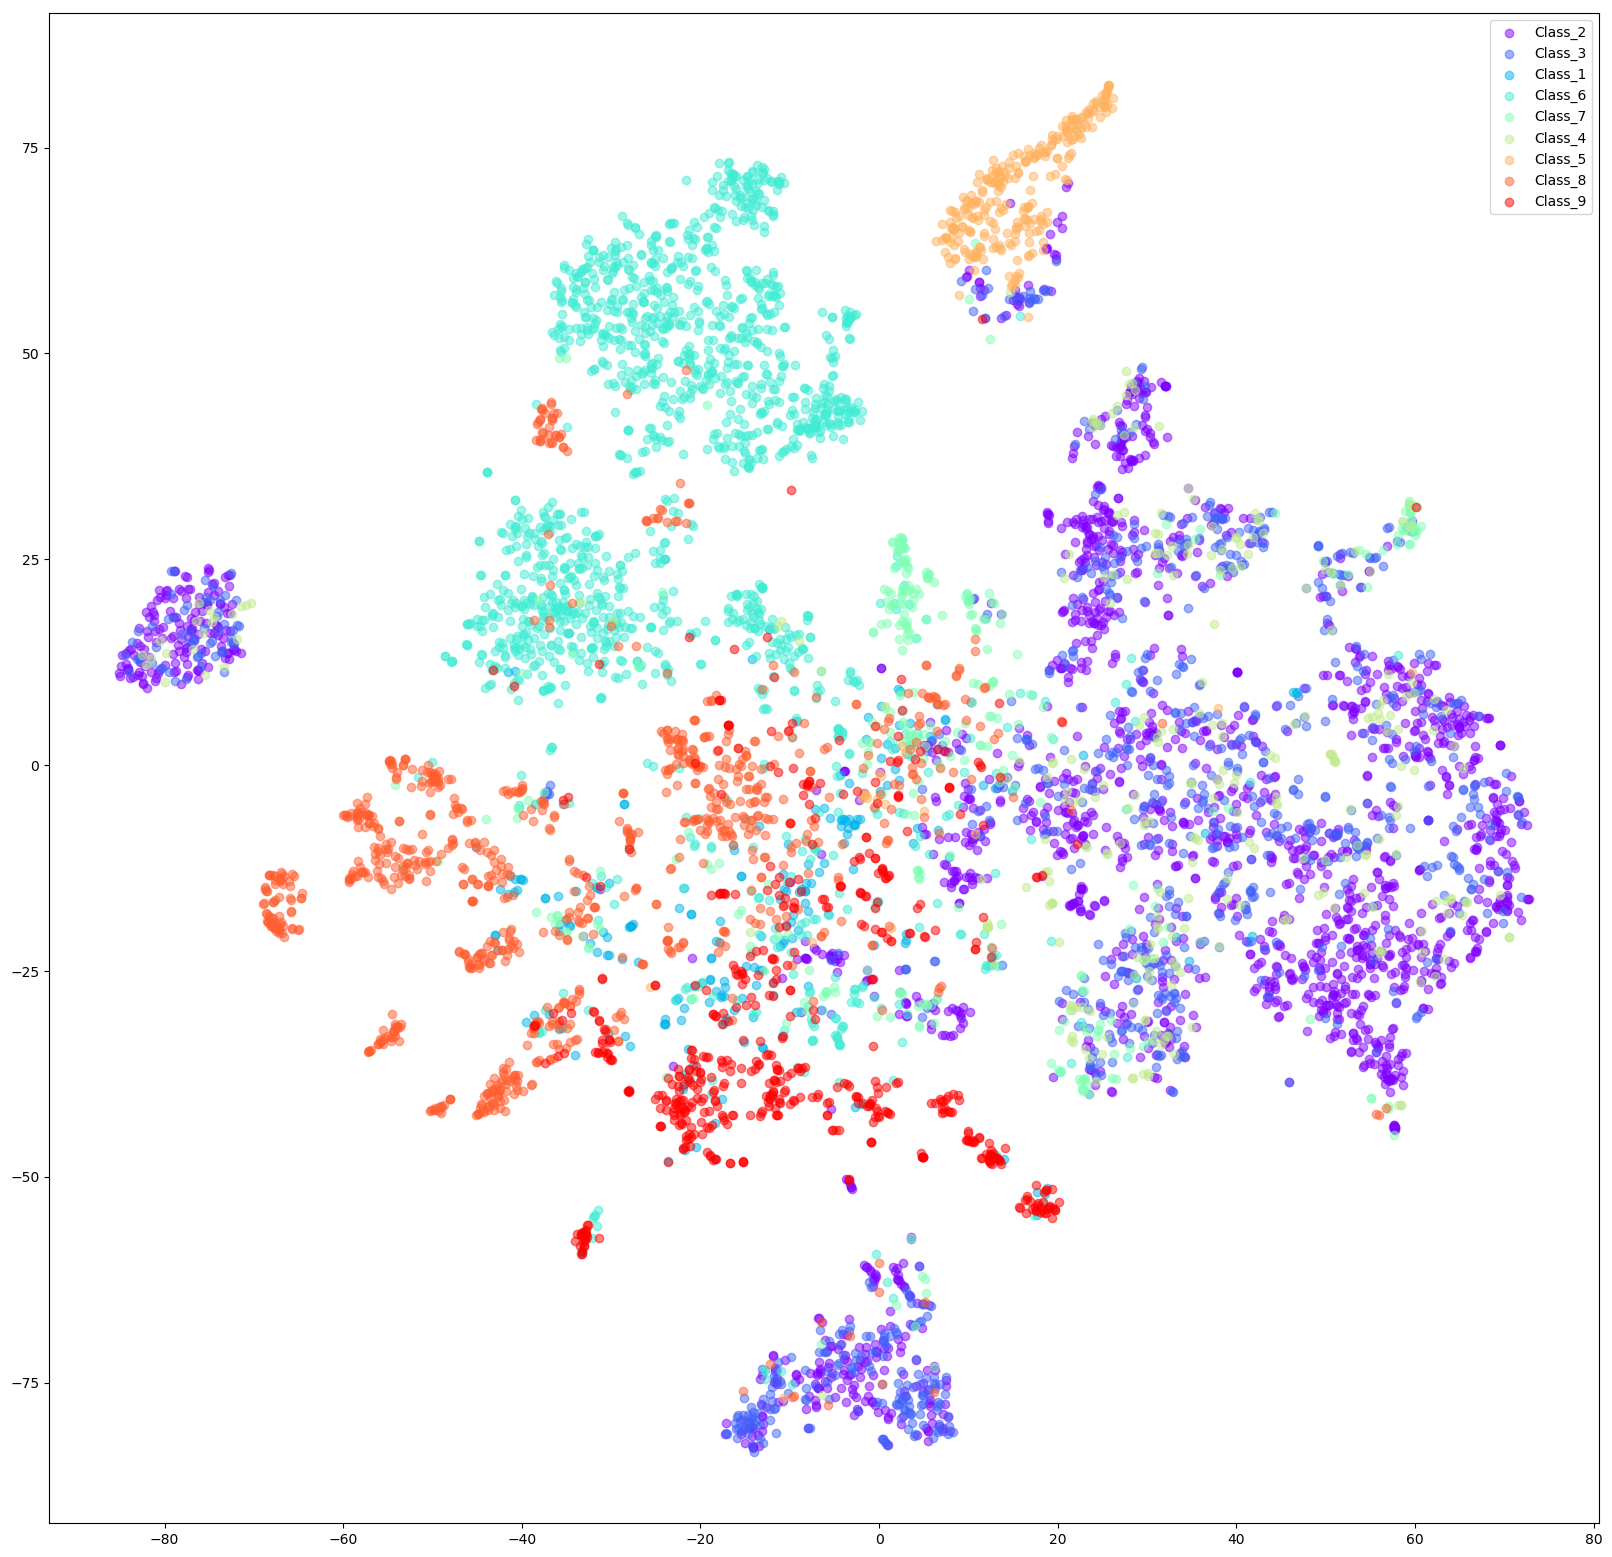

In [21]:
plt.figure(figsize=(20, 20), dpi=100)
for y, c in zip(set(targetTrainNew), colors):
    plt.scatter(transformTSNE_representation[np.array(targetTrainNew)==y, 0], 
                transformTSNE_representation[np.array(targetTrainNew)==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

### Обучение моделей

Обучите логистическую регрессию (linear_model.LogisticRegression) и случайный лес (ensemble.RandomForestClassifier) из sklearn. В первом случае подберите оптимальный параметр $C$ на отрезке $[10^{-4}, 10^{4}]$ (по степеням $10$ с шагом $1$, начиная с $-4$), а во втором при фиксированном числе деревьев в 50 подберите $max\_depth$ из отрезка $[2, 48]$ с шагом в 2. За целевую метрику качества возьмите мультиклассовый log-loss. В качестве схемы валидации используйте стратифицированную кросс-валидацию по 5-ти фолдам. Какие параметры оказались оптимальными? 

In [73]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection
from sklearn import ensemble
c = []
step = np.arange(-4, 5, 1)
for i in step:
    c.append(pow(10,int(i)))
print c

maxDepth = np.arange(2,50,2)
print maxDepth
#modelLogReg = LogisticRegression.fit(c)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]


In [74]:
regressor = LogisticRegressionCV(random_state = 693, cv=5, Cs=c)

In [75]:
regressor.fit(training,np.array(targetTrainNew))

LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=693, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Посчитайте accuracy и log-loss на отложенной выборке для логистической регрессии и случайного леса. Какие они получились? Какой алгоритм лучше?

In [76]:
#predictions = regressor.predict(test)
predictions = regressor.predict_proba(test)

In [116]:
targetTestNew = []
for z in targetTest.values:
    targetTestNew.append(int(z[0][6:]))

In [283]:
#int(targetTest.values[0][0][6:])
#targetTestNew

In [78]:
predictions

array([[1.05324735e-04, 6.82219355e-01, 2.53969492e-01, ...,
        4.62948009e-05, 2.38712620e-07, 5.43377886e-07],
       [1.56085244e-01, 9.30501639e-02, 7.00002572e-02, ...,
        1.65416193e-01, 7.44715208e-02, 4.19381144e-01],
       [2.59274629e-02, 5.62029048e-01, 2.84061387e-01, ...,
        1.67646291e-02, 1.07767215e-02, 7.18039701e-03],
       ...,
       [3.61070973e-02, 6.14052503e-02, 9.37584469e-03, ...,
        9.86910674e-06, 1.56350131e-02, 8.71272975e-01],
       [1.10709280e-03, 2.57470586e-04, 2.84523221e-03, ...,
        7.12454632e-03, 9.01900061e-05, 2.23300301e-06],
       [9.21382570e-02, 4.56592646e-01, 7.26552102e-02, ...,
        9.50987957e-02, 8.47963352e-02, 8.74830438e-02]])

In [79]:
metrics.log_loss(np.array(targetTestNew), predictions)

0.7267785414602711

In [112]:
maxDepNew = []
for i in maxDepth:
    randFor = ensemble.RandomForestClassifier(random_state=998, max_depth=i, n_estimators=50)
    randFor.fit(training,np.array(targetTrainNew))
    predictions = randFor.predict_proba(test)
    metricForest = metrics.log_loss(np.array(targetTestNew), predictions)
    maxDepNew.append([metricForest,i])

In [113]:
maxDepNew

[[1.6281459447120135, 2],
 [1.3947041115079415, 4],
 [1.2170827537101176, 6],
 [1.0846098688640398, 8],
 [0.9941366529265006, 10],
 [0.9204649112546455, 12],
 [0.8763547612975818, 14],
 [0.8252557325981431, 16],
 [0.8017972643127366, 18],
 [0.7981089295330546, 20],
 [0.812009159326798, 22],
 [0.758505391561787, 24],
 [0.7783435424175459, 26],
 [0.8219537676457367, 28],
 [0.809751063443474, 30],
 [0.7690724359248401, 32],
 [0.8044944508809037, 34],
 [0.8260157487395107, 36],
 [0.8582281521577816, 38],
 [0.8242150974272351, 40],
 [0.8579495120106357, 42],
 [0.8571006350143457, 44],
 [0.8421500682882394, 46],
 [0.8309308542208684, 48]]

### Использование PCA для улучшения классификации

Теперь попробуйте использовать PCA для улучшения качества классификации. Добавьте признаки из маломерного пространства (по 2 числа на каждый объект) в обучающую и тестовую выборку. Заново переподберите параметры к логистической регрессии и случайному лесу. Удалось ли таким образом улучшить качество моделей? Почему с теоретической точки зрения добавление признаков из PCA не должно улучшить качество логистической регрессии?

### Использование t-SNE для улучшения классификации

Теперь проделайте тоже самое с признаками из t-SNE. Стало ли лучше (относительно оригинальных признаков)?